In [1]:
import numpy as np
import scipy.sparse as sps
import scipy.linalg as spl
import scipy.sparse.linalg as spsl

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import time

from pyshtools.legendre import PlmSchmidt_d1
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from tools import *

In [2]:
radii = dat_to_xarray("data/radial789/picked_mode.dat").radius
r310 = float(radii.sel(radius_ID=310))
r330 = float(radii.sel(radius_ID=330))
r350 = float(radii.sel(radius_ID=350))

In [4]:
picked = dat_to_xarray("data/data808/picked_mode_all_lm_310_330_350.dat")

# Radius 1.49

## Inertia & $u_r$

In [24]:
%%time
theta = np.linspace(1e-6, np.pi-1e-6, 300)
phi = np.linspace(1e-6, 2*np.pi-1e-6, 300)
theta, phi = np.meshgrid(theta, phi)

# The Cartesian coordinates of the unit sphere
X = np.sin(theta) * np.cos(phi)
Y = np.sin(theta) * np.sin(phi)
Z = np.cos(theta)

inertia_theta_200,inertia_phi_200 = torpol_to_thetaphi_sph_fixedr(theta,phi,picked.inertia_tor.sel(degree=slice(0,200),radius_ID=310).squeeze(),picked.inertia_pol_dr.sel(degree=slice(0,200),radius_ID=310).squeeze(),r310)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 CPU times: user 5min 7s, sys: 2min 8s, total: 7min 16s
Wall time: 7min 35s


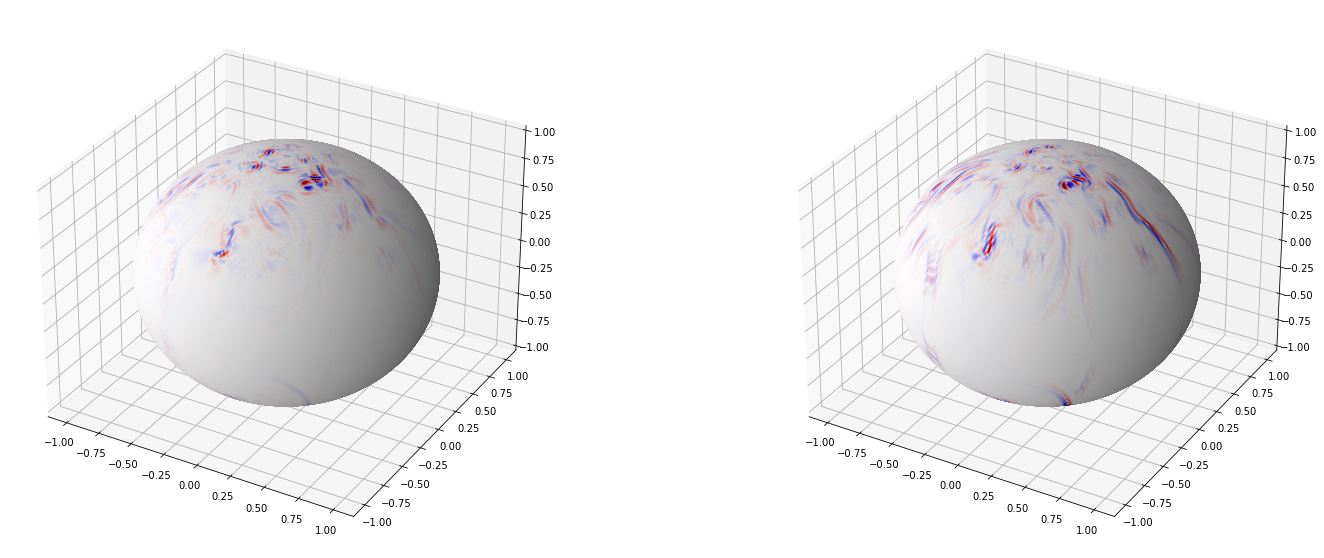

In [25]:
fig,ax = plt.subplots(1,2,figsize=(25.,10.), subplot_kw = {'projection':'3d'})
ax[0].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_theta_200/(2*inertia_theta_200.max())+0.5))
ax[1].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_phi_200/(2*inertia_phi_200.max())+0.5))


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 CPU times: user 37.4 s, sys: 13.1 s, total: 50.5 s
Wall time: 53.9 s


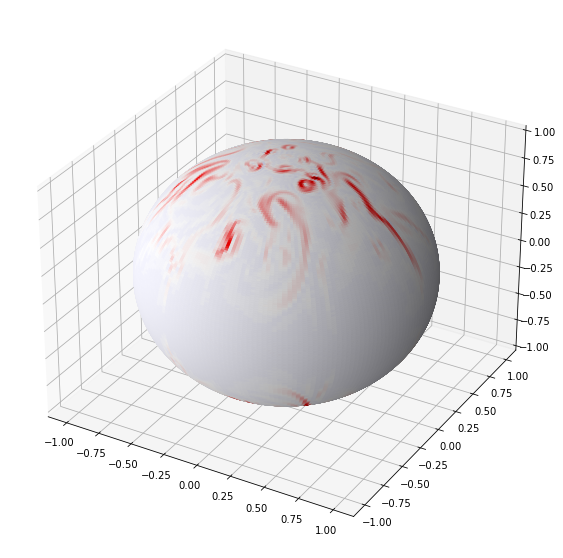

In [449]:
%%time
theta = np.linspace(1e-6, np.pi-1e-6, 200)
phi = np.linspace(1e-6, 2*np.pi-1e-6, 200)
theta, phi = np.meshgrid(theta, phi)

# The Cartesian coordinates of the unit sphere
X = np.sin(theta) * np.cos(phi)
Y = np.sin(theta) * np.sin(phi)
Z = np.cos(theta)

inertia_r_200_350 = sphpol_to_r_fast(theta,phi,picked.inertia_pol.sel(degree=slice(0,200),radius_ID=350).squeeze(),r350)
fig,ax = plt.subplots(1,1,figsize=(10.,10.), subplot_kw = {'projection':'3d'})
ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_r_200_350/(2*inertia_r_200_350.max())+0.5))

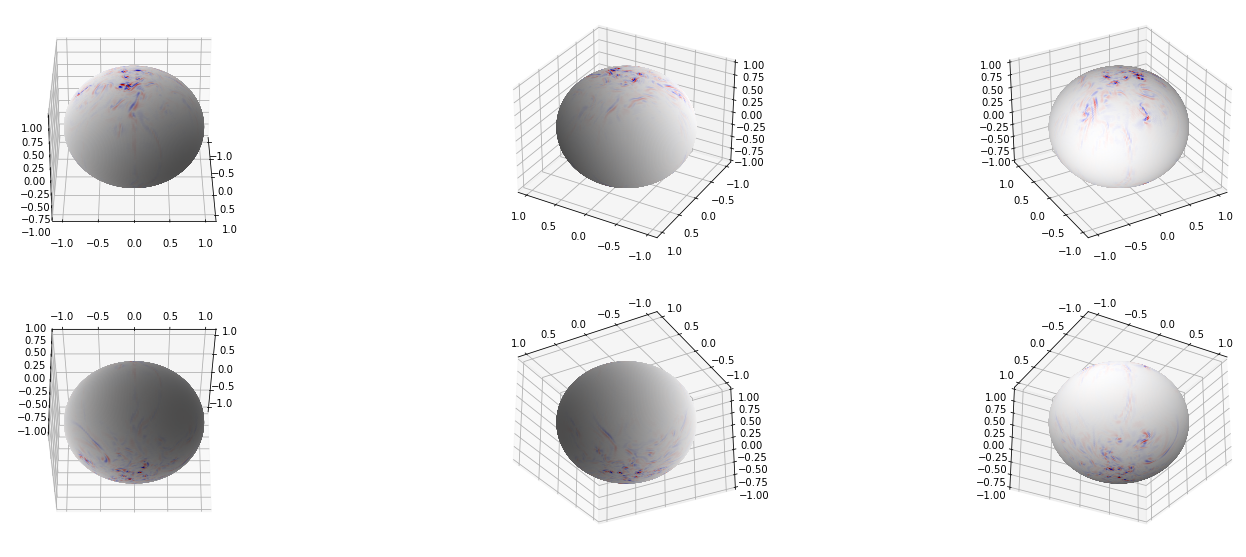

In [57]:
fig,ax = plt.subplots(2,3,figsize=(25.,10.), subplot_kw = {'projection':'3d'})

for i in range(3): 
    ax[0,i].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_theta_200/(2*inertia_theta_200.max())+0.5))
    ax[0,i].view_init(30, i*120)

for i in range(3): 
    ax[1,i].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_theta_200/(2*inertia_theta_200.max())+0.5))
      


In [184]:
%%time
ur200 = pol_to_r_sph_fixedr(theta,phi,picked.velocity_pol.sel(degree=slice(0,200),radius_ID=310).squeeze(),r310)



0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 CPU times: user 1min 17s, sys: 27.3 s, total: 1min 44s
Wall time: 1min 58s


Text(0.5, 0.92, 'inertia_phi at radius = 1.49')

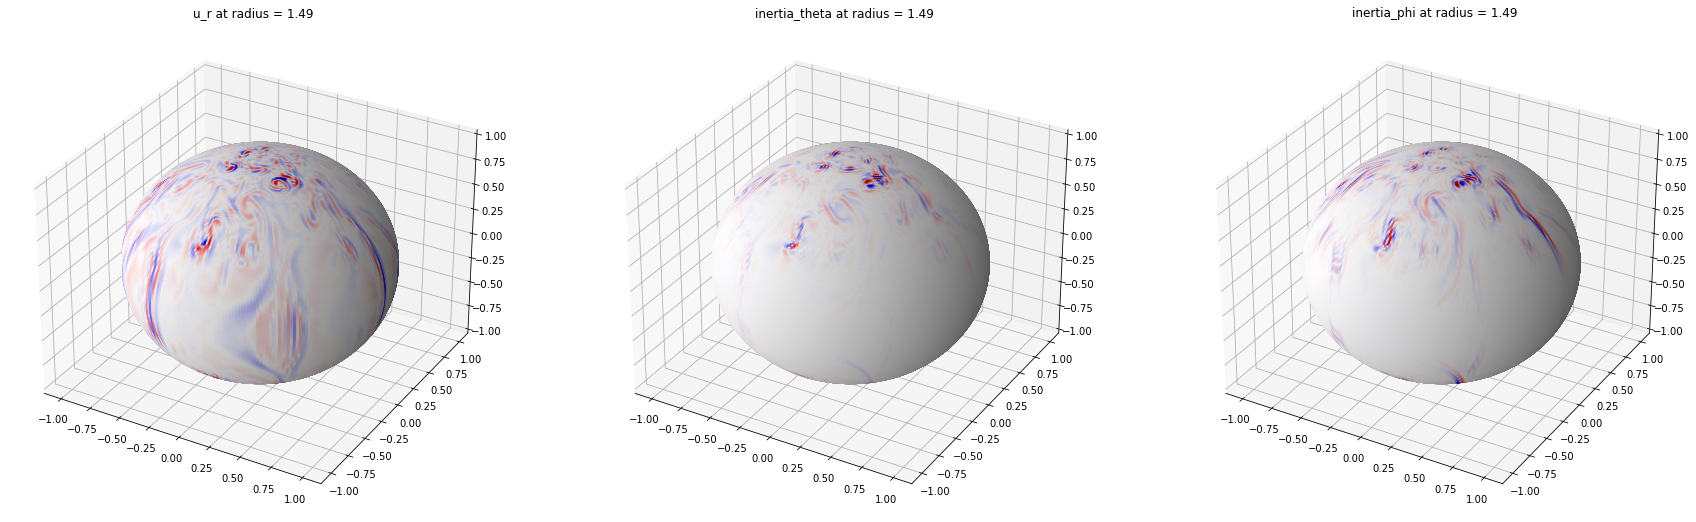

In [189]:
fig,ax = plt.subplots(1,3,figsize=(30.,10.), subplot_kw = {'projection':'3d'})
ax[0].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(ur200/(2*ur200.max())+0.5))
ax[1].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_theta_200/(2*inertia_theta_200.max())+0.5))
ax[2].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_phi_200/(2*inertia_phi_200.max())+0.5))
ax[0].set_title("u_r at radius = 1.49")
ax[1].set_title("inertia_theta at radius = 1.49")
ax[2].set_title("inertia_phi at radius = 1.49")

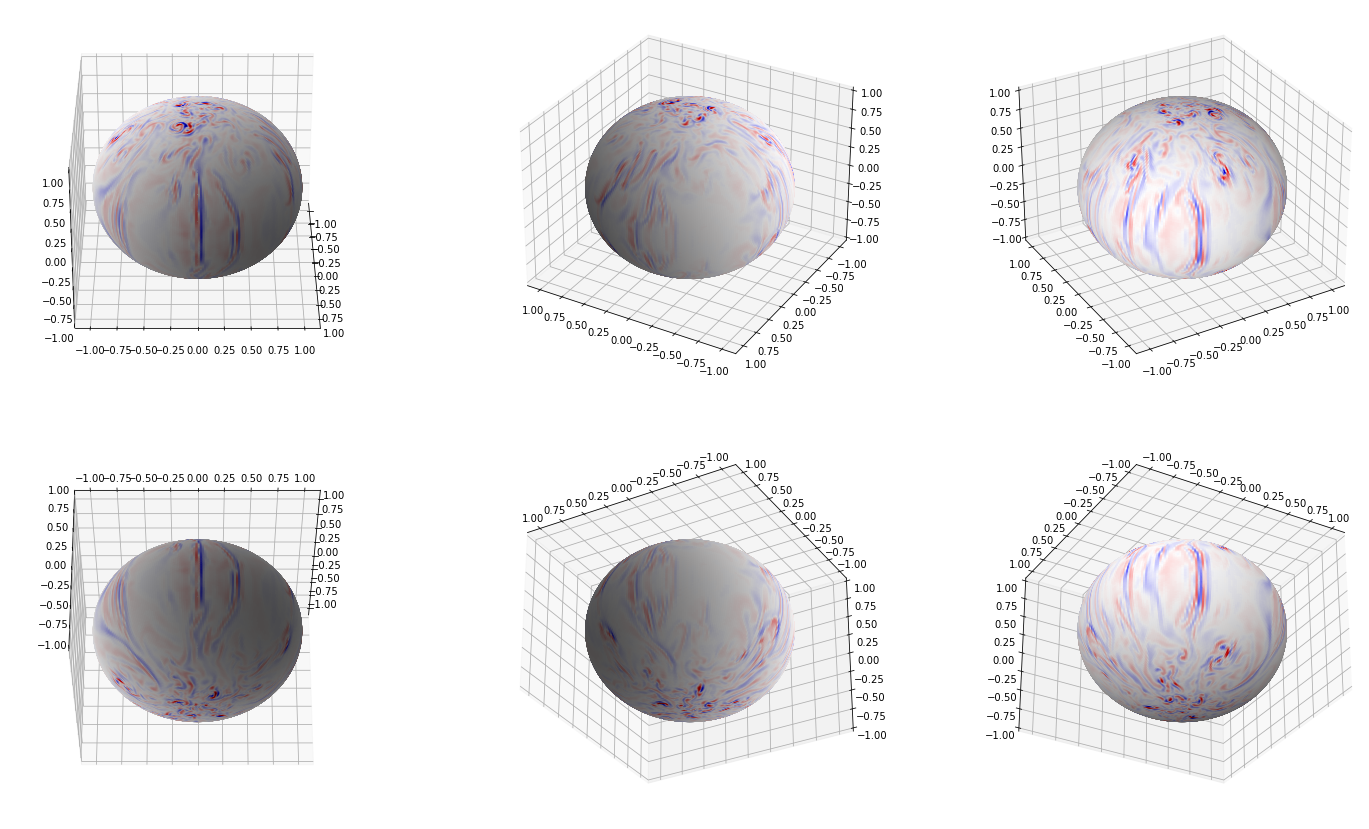

In [111]:
fig,ax = plt.subplots(2,3,figsize=(25.,15.), subplot_kw = {'projection':'3d'})

for i in range(3): 
    ax[0,i].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(ur200/(2*ur200.max())+0.5))
    ax[0,i].view_init(30, i*120)

for i in range(3): 
    ax[1,i].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(ur200/(2*ur200.max())+0.5))
    ax[1,i].view_init(-30, i*120)    


## u_theta, u_phi

In [192]:
%%time
utheta200_310,uphi200_310 = torpol_to_thetaphi_sph_fixedr(theta,phi,picked.velocity_tor.sel(degree=slice(0,200),radius_ID=310).squeeze(),picked.velocity_pol_dr.sel(degree=slice(0,200),radius_ID=310).squeeze(),r310)
utheta200_330,uphi200_330 = torpol_to_thetaphi_sph_fixedr(theta,phi,picked.velocity_tor.sel(degree=slice(0,200),radius_ID=330).squeeze(),picked.velocity_pol_dr.sel(degree=slice(0,200),radius_ID=330).squeeze(),r330)



0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 

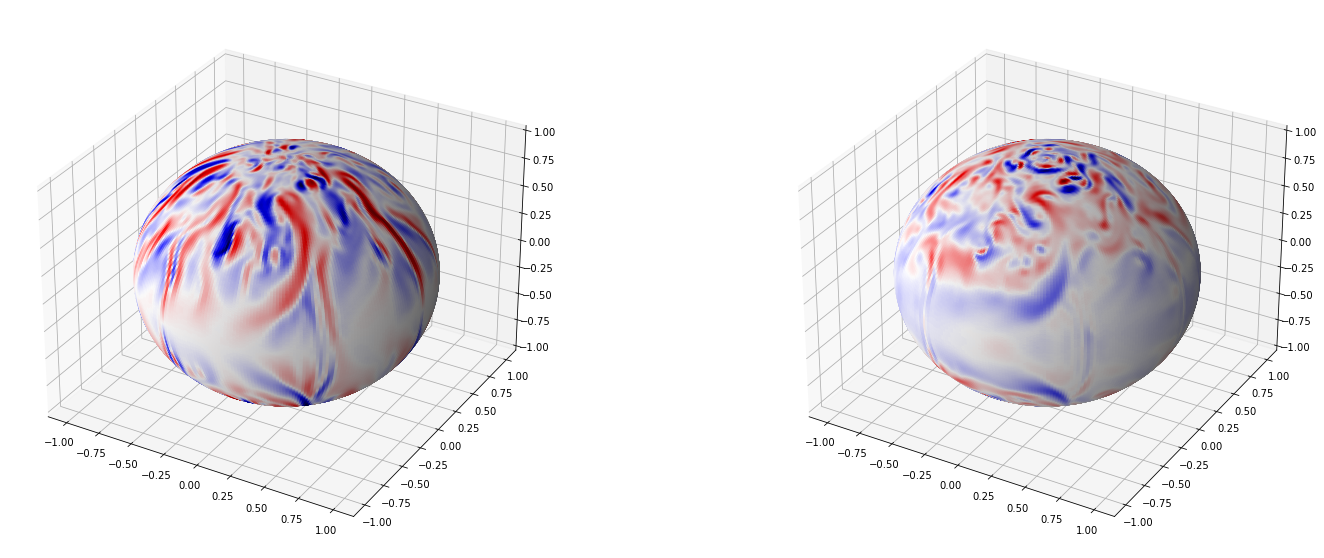

In [196]:
fig,ax = plt.subplots(1,2,figsize=(25.,10.), subplot_kw = {'projection':'3d'})
ax[0].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(utheta200_330/(2*utheta200_330.max())+0.5))
ax[1].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(uphi200_330/(2*uphi200_330.max())+0.5))


## Temperature (scalar test)

In [286]:
theta = np.linspace(1e-6, np.pi-1e-6, 300)
phi = np.linspace(1e-6, 2*np.pi-1e-6, 300)
theta, phi = np.meshgrid(theta, phi)

# The Cartesian coordinates of the unit sphere
X = np.sin(theta) * np.cos(phi)
Y = np.sin(theta) * np.sin(phi)
Z = np.cos(theta)

In [287]:
%%time
temp200 = scalar_sph_fixedr(theta,phi,picked.temperature.sel(degree=slice(0,200),radius_ID=310).squeeze(),r310)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 CPU times: user 1min 13s, sys: 26.4 s, total: 1min 39s
Wall time: 1min 42s


Text(0.5, 0.92, 'temperature at radius = 1.49')

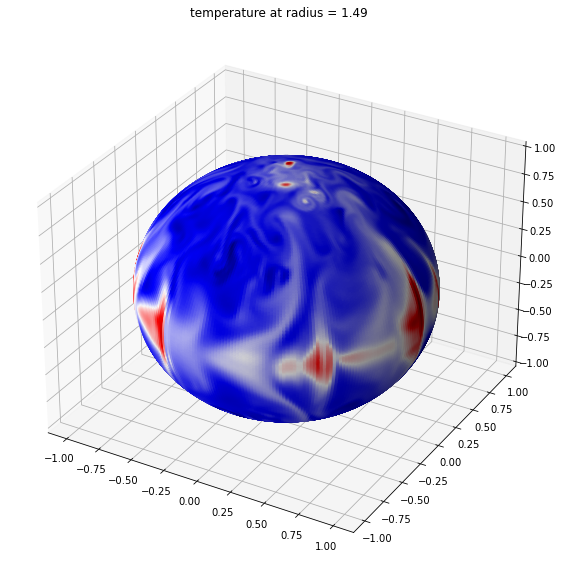

In [288]:
fig,ax = plt.subplots(1,1,figsize=(10.,10.), subplot_kw = {'projection':'3d'})
ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(temp200/(2*temp200.max())+0.5))
ax.set_title("temperature at radius = 1.49")

# theta-r view for m=3

In [7]:
picked_lr = dat_to_xarray("data/data808/picked_mode_all_rl_m3.dat")

In [8]:
theta = np.linspace(1e-6, np.pi-1e-6, 200)
phi = np.linspace(1e-6, 2*np.pi-1e-6, 200)
theta, phi = np.meshgrid(theta, phi)

# The Cartesian coordinates of the unit sphere
X = np.sin(theta) * np.cos(phi)
Y = np.sin(theta) * np.sin(phi)
Z = np.cos(theta)

In [9]:
T   =picked_lr.inertia_tor.isel(radius_ID=350).squeeze()
S   =picked_lr.inertia_pol.isel(radius_ID=350).squeeze()
dSdr=picked_lr.inertia_pol_dr.isel(radius_ID=350).squeeze()

%time inertia_theta_m3,inertia_phi_m3 = torpol_to_thetaphi_sph_fixedrm(theta,phi,T,dSdr,float(picked_lr.radius.isel(radius_ID=350)),3)
%time inertia_r_m3 = pol_to_r_sph_fixedrm(theta,phi,S,float(picked_lr.radius.isel(radius_ID=350)),3)

CPU times: user 396 ms, sys: 214 ms, total: 610 ms
Wall time: 636 ms
CPU times: user 239 ms, sys: 152 ms, total: 391 ms
Wall time: 441 ms


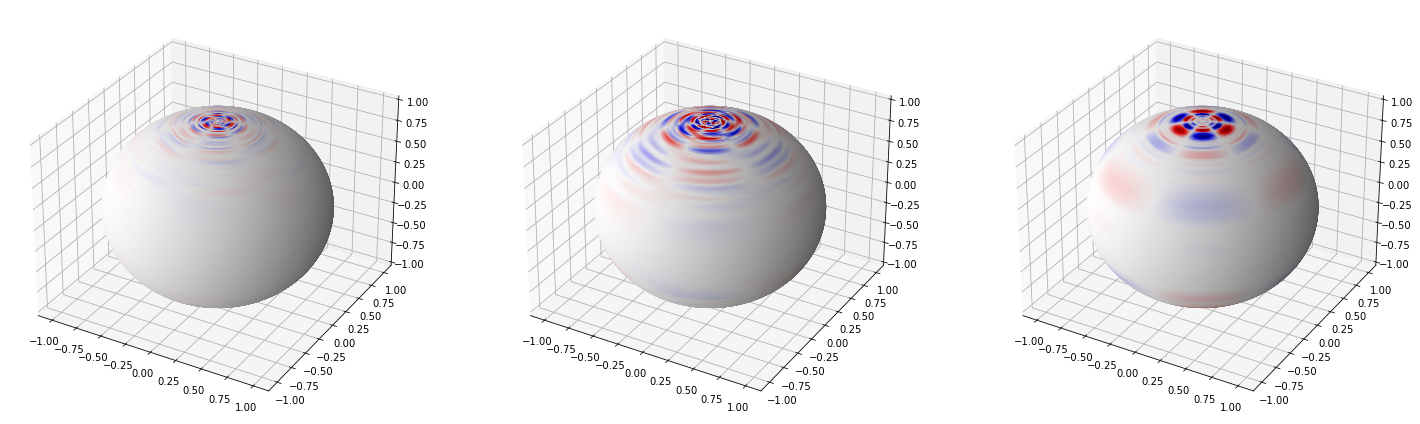

In [296]:
fig,ax = plt.subplots(1,3,figsize=(25.,10.), subplot_kw = {'projection':'3d'})
ax[0].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_theta_m3/(2*inertia_theta_m3.max())+0.5))
ax[1].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_phi_m3/(2*inertia_phi_m3.max())+0.5))
ax[2].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_r_m3/(2*inertia_r_m3.max())+0.5))

In [10]:
T   =picked_lr.inertia_tor.isel(radius_ID=290).squeeze()
S   =picked_lr.inertia_pol.isel(radius_ID=290).squeeze()
dSdr=picked_lr.inertia_pol_dr.isel(radius_ID=290).squeeze()

%time inertia_theta_m3_290,inertia_phi_m3_290 = torpol_to_thetaphi_sph_fixedrm(theta,phi,T,dSdr,float(picked_lr.radius.isel(radius_ID=290)),3)

CPU times: user 377 ms, sys: 184 ms, total: 560 ms
Wall time: 583 ms


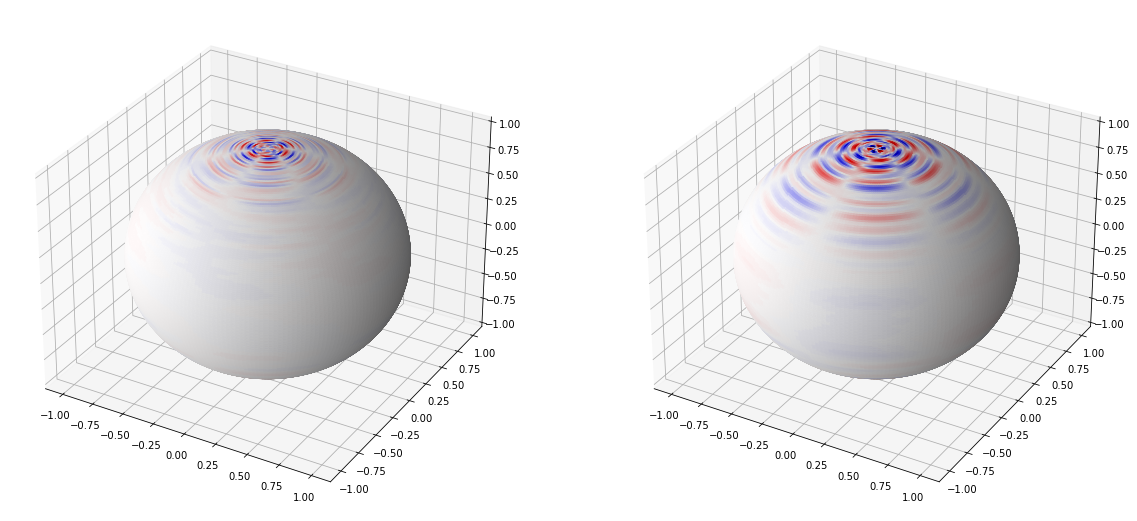

In [363]:
fig,ax = plt.subplots(1,2,figsize=(20.,10.), subplot_kw = {'projection':'3d'})
ax[0].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_theta_m3_290/(2*inertia_theta_m3_290.max())+0.5))
ax[1].plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_phi_m3_290/(2*inertia_phi_m3_290.max())+0.5))

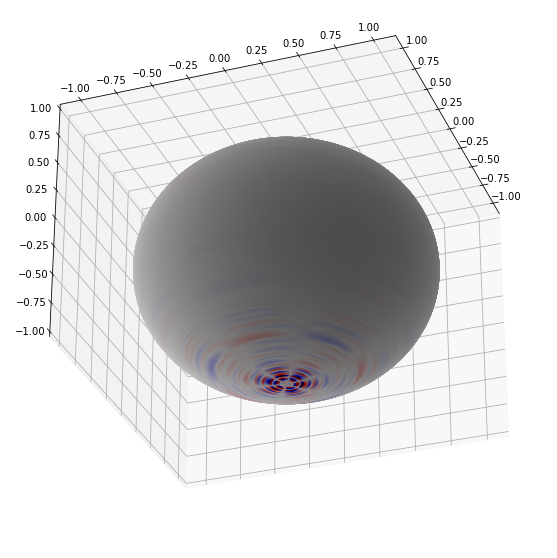

In [365]:
fig,ax = plt.subplots(1,1,figsize=(10.,10.), subplot_kw = {'projection':'3d'})
ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(inertia_theta_m3_290/(2*inertia_theta_m3_290.max())+0.5))
ax.view_init(-30, 20)  

In [11]:
%%time
def setycos(ngrid):
    """Sets the grid (ngrid points between -1 and 1, without the boundaries)"""
    return np.cos(np.linspace(0.,np.pi,ngrid+2)[1:-1][::-1]) #exclude the -1 and 1 bounds to avoid divisions by 0
    #return np.linspace(-1.,1.,ngrid+2)[1:-1] #exclude the -1 and 1 bounds to avoid divisions by 0

y=setycos(300)

T   =picked_lr.inertia_tor.squeeze()
S   =picked_lr.inertia_pol.squeeze()
dSdr=picked_lr.inertia_pol_dr.squeeze()
inertia_theta_m3_cx,inertia_phi_m3_cx = torpol_to_thetaphi_ycomplex_fixedm(y,T,dSdr,3)
inertia_r_m3_cx = pol_to_r_ycomplex_fixedm(y,S,3)

T   =picked_lr.Lorentz_force_tor.squeeze()
S   =picked_lr.Lorentz_force_pol.squeeze()
dSdr=picked_lr.Lorentz_force_pol_dr.squeeze()
lorentz_theta_m3_cx,lorentz_phi_m3_cx = torpol_to_thetaphi_ycomplex_fixedm(y,T,dSdr,3)
lorentz_r_m3_cx = pol_to_r_ycomplex_fixedm(y,S,3)

scalar   =picked_lr.heat_advect.squeeze()
heat_advect_m3_cx = scalar_ycomplex_fixedm(y,scalar,3)

CPU times: user 2.91 s, sys: 2.3 s, total: 5.21 s
Wall time: 5.51 s


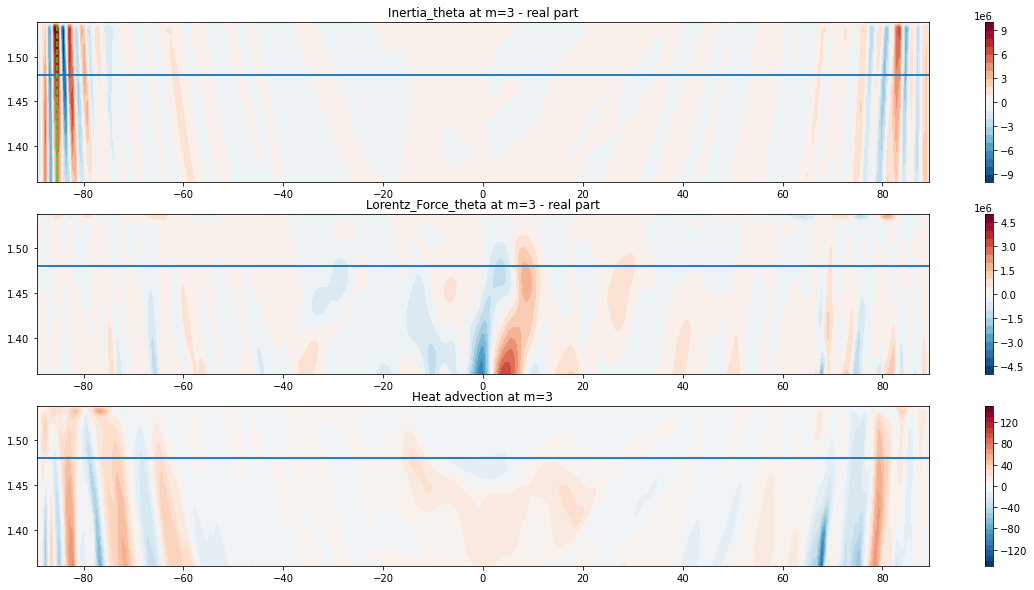

In [12]:
radius_threshold=260

fig,ax=plt.subplots(3,1,figsize=(20,10))

cf=ax[0].contourf(np.arcsin(y)*180/np.pi,picked_lr.radius[radius_threshold:],np.real(inertia_theta_m3_cx[radius_threshold:]),levels=np.arange(-1e7,1e7+1,1e6),cmap=plt.cm.RdBu_r)
fig.colorbar(cf,ax=ax[0])

cf=ax[1].contourf(np.arcsin(y)*180/np.pi,picked_lr.radius[radius_threshold:],np.real(lorentz_theta_m3_cx[radius_threshold:]),levels=np.arange(-5e6,5e6+1,5e5),cmap=plt.cm.RdBu_r)
fig.colorbar(cf,ax=ax[1])

cf=ax[2].contourf(np.arcsin(y)*180/np.pi,picked_lr.radius[radius_threshold:],np.real(heat_advect_m3_cx[radius_threshold:]),levels=np.arange(-150,151,10),cmap=plt.cm.RdBu_r)
fig.colorbar(cf,ax=ax[2])

ax[0].set_title('Inertia_theta at m=3 - real part')
ax[1].set_title('Lorentz_Force_theta at m=3 - real part')
ax[2].set_title('Heat advection at m=3')

for a in ax:
    a.axhline(1.48)
    a.axhline(1.48)
    
ax[0].axvline(np.arcsin(y[7])*180/np.pi,color="lime",linestyle='--')


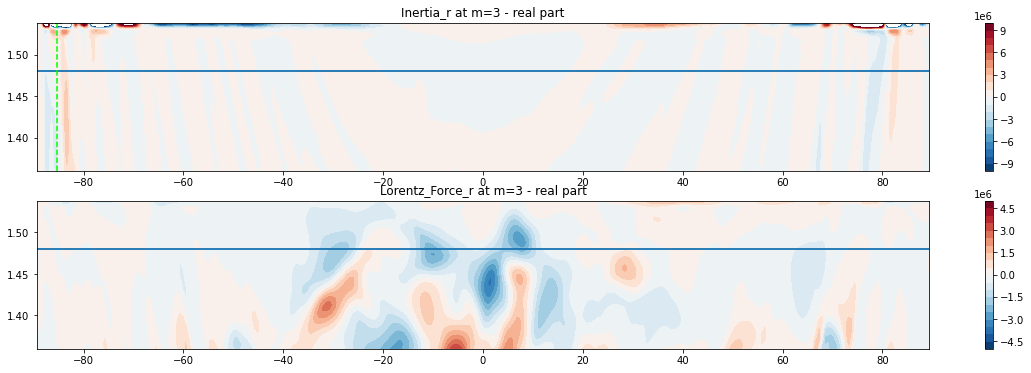

In [14]:
radius_threshold=260

fig,ax=plt.subplots(2,1,figsize=(20,6))

cf=ax[0].contourf(np.arcsin(y)*180/np.pi,picked_lr.radius[radius_threshold:],np.real(inertia_r_m3_cx[radius_threshold:]),levels=np.arange(-1e7,1e7+1,1e6),cmap=plt.cm.RdBu_r)
fig.colorbar(cf,ax=ax[0])

cf=ax[1].contourf(np.arcsin(y)*180/np.pi,picked_lr.radius[radius_threshold:],np.real(lorentz_r_m3_cx[radius_threshold:]),levels=np.arange(-5e6,5e6+1,5e5),cmap=plt.cm.RdBu_r)
fig.colorbar(cf,ax=ax[1])

ax[0].set_title('Inertia_r at m=3 - real part')
ax[1].set_title('Lorentz_Force_r at m=3 - real part')

for a in ax:
    a.axhline(1.48)
    a.axhline(1.48)
    
ax[0].axvline(np.arcsin(y[7])*180/np.pi,color="lime",linestyle='--')



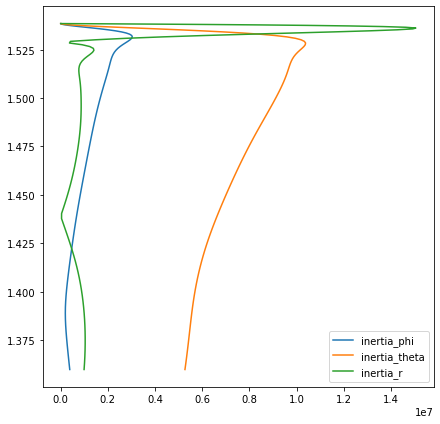

In [15]:
radius_threshold=260

fig,ax=plt.subplots(1,1,figsize=(7,7))

ax.plot(np.abs(inertia_phi_m3_cx[radius_threshold:,7]),picked_lr.radius[radius_threshold:]  ,label='inertia_phi')
ax.plot(np.abs(inertia_theta_m3_cx[radius_threshold:,7]),picked_lr.radius[radius_threshold:],label='inertia_theta')
ax.plot(np.abs(inertia_r_m3_cx[radius_threshold:,7]),picked_lr.radius[radius_threshold:]    ,label='inertia_r')

ax.legend()



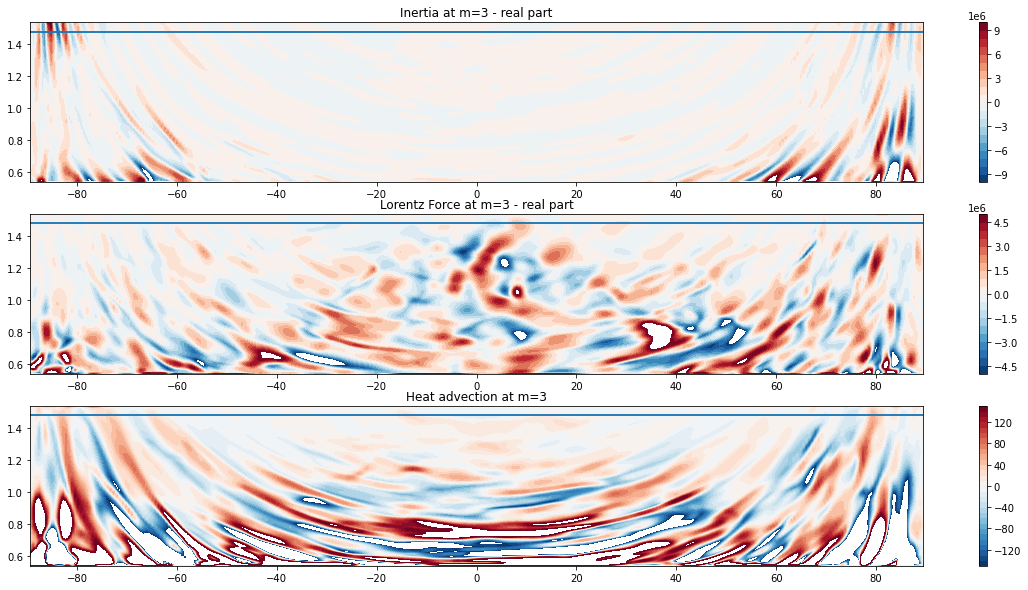

In [17]:
radius_threshold=0

fig,ax=plt.subplots(3,1,figsize=(20,10))

cf=ax[0].contourf(np.arcsin(y)*180/np.pi,picked_lr.radius[radius_threshold:],np.real(inertia_theta_m3_cx[radius_threshold:]),levels=np.arange(-1e7,1e7+1,1e6),cmap=plt.cm.RdBu_r)
fig.colorbar(cf,ax=ax[0])

cf=ax[1].contourf(np.arcsin(y)*180/np.pi,picked_lr.radius[radius_threshold:],np.real(lorentz_theta_m3_cx[radius_threshold:]),levels=np.arange(-5e6,5e6+1,5e5),cmap=plt.cm.RdBu_r)
fig.colorbar(cf,ax=ax[1])

cf=ax[2].contourf(np.arcsin(y)*180/np.pi,picked_lr.radius[radius_threshold:],np.real(heat_advect_m3_cx[radius_threshold:]),levels=np.arange(-150,151,10),cmap=plt.cm.RdBu_r)
fig.colorbar(cf,ax=ax[2])

ax[0].set_title('Inertia at m=3 - real part')
ax[1].set_title('Lorentz Force at m=3 - real part')
ax[2].set_title('Heat advection at m=3')

for a in ax:
    a.axhline(1.48)
    a.axhline(1.48)

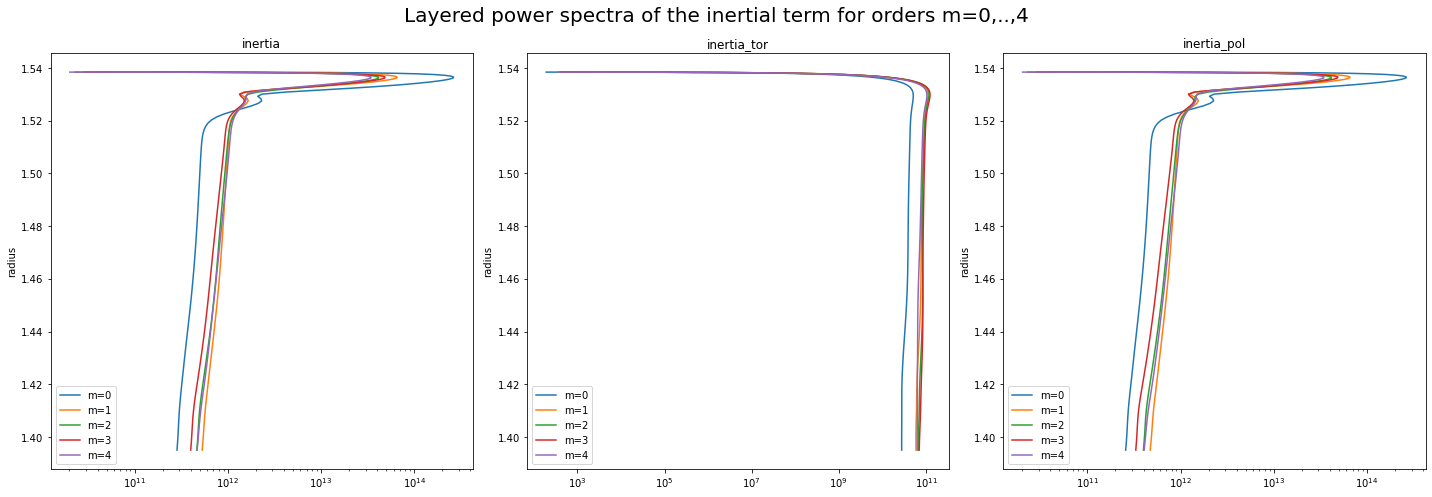

In [18]:
layered_m_radial = dat_to_xarray("data/radial790/sph_pwr_layer_m.dat")

fig,ax=plt.subplots(1,3,figsize=(20,7))

for a,var in zip(ax,['inertia','inertia_tor','inertia_pol']):
    for i in range(5):
        a.plot(layered_m_radial[var].isel(order=i,radial_id=slice(-90,-1)).mean('t_step').squeeze(),picked_lr.radius.isel(radius_ID=slice(-90,-1)),'-',label="m=%i"%i)
    a.set_title(var)
    a.set_ylabel('radius')
    a.legend()
    a.set_xscale('log')
    
fig.suptitle("Layered power spectra of the inertial term for orders m=0,..,4",fontsize=20)
fig.tight_layout()



# Time analysis

In [452]:
L=2270e3
pm=0.5
eta=0.8
ntsteps20yrs = 20/(L**2/eta/pm/86400/365.25 * 1e-7)
print(ntsteps20yrs)

489.93925750548243


In [454]:
picked_lr

<xarray.Dataset>
Dimensions:                (degree: 253, order: 1, radius_ID: 361, t_step: 1)
Coordinates:
  * t_step                 (t_step) int64 16160200
  * radius_ID              (radius_ID) int64 1 2 3 4 5 6 ... 357 358 359 360 361
  * degree                 (degree) int64 3 4 5 6 7 8 ... 251 252 253 254 255
  * order                  (order) int64 3
    time                   (t_step) float64 7.831
    radius                 (radius_ID) float64 0.5385 0.5385 ... 1.538 1.538
Data variables:
    temperature            (t_step, radius_ID, degree, order) float64 0.0 ......
    velocity_pol           (t_step, radius_ID, degree, order) float64 0.0 ......
    velocity_tor           (t_step, radius_ID, degree, order) float64 0.0 ......
    velocity_pol_dr        (t_step, radius_ID, degree, order) float64 0.0 ......
    pressure               (t_step, radius_ID, degree, order) float64 3.466 ....
    magnetic_field_pol     (t_step, radius_ID, degree, order) float64 0.00114...
    magnetic_field_tor     (t_step, radius_ID, degree, order) float64 0.0 ......
    magnetic_field_pol_dr  (t_step, radius_ID, degree, order) float64 0.00852...
    heat_source            (t_step, radius_ID, degree, order) float64 0.0 ......
    heat_advect            (t_step, radius_ID, degree, order) float64 -0.0068...
    inertia_pol            (t_step, radius_ID, degree, order) float64 0.0 ......
    inertia_tor            (t_step, radius_ID, degree, order) float64 0.0 ......
    inertia_pol_dr         (t_step, radius_ID, degree, order) float64 0.0 ......
    Lorentz_force_pol      (t_step, radius_ID, degree, order) float64 -4.424e...
    Lorentz_force_tor      (t_step, radius_ID, degree, order) float64 1.143e+...
    Lorentz_force_pol_dr   (t_step, radius_ID, degree, order) float64 -3.077e...

In [455]:
43*10/16*400*100/360

2986.1111111111113